In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

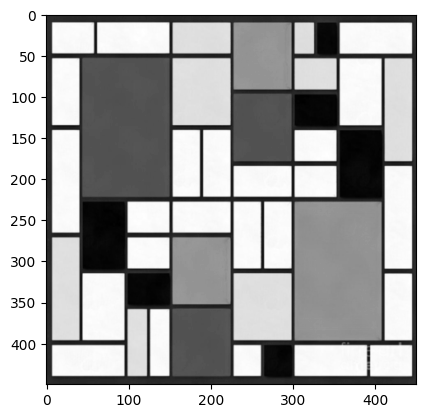

In [2]:
img = cv2.imread("../../data/Squares.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.pyrDown(img)

plt.imshow(img, cmap = "gray")


In [3]:

h,w = img.shape

img = np.pad(img, [(2, 2),(2,2)], mode='constant')
directions = np.array([[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]])
change = np.zeros((8))
thresh = 80
s, c = 0, 0
new = np.zeros_like(img)

for i in range(2,h+2):
    for j in range(2, w+2):
        kernel = img[i-1:i+2, j-1:j+2].copy()
        #print(kernel)
        for id, d in enumerate(directions):
            p = img[i-1+d[0]:i+2+d[0], j-1+d[1]:j+2+d[1]]
            print(kernel)
            print(p)
            print("---")
            print(np.subtract(kernel, p))
            a = np.zeros((3, 3))
            print(np.square(x = np.subtract(kernel, p)))
            print(a)
            print(np.sum(np.square(np.subtract(kernel, p))))
            change[id] = np.sum(np.square(np.subtract(kernel, p)))
            break
            #change[id] = np.mean(np.absolute(np.subtract(kernel, p)))
            s += change[id]
            c += 1
        up, down, left, right = change[[1, 3, 4, 6]]
        #horizontal
        if up > thresh and down > thresh and left < thresh and right < thresh:
            new[i, j] = 0
        if left > thresh and right > thresh and up < thresh and down < thresh:
            new[i, j] = 0
        if up > thresh and down > thresh and left > thresh and right > thresh:
            new[i, j] = 255
        break
    break
print(s, c, s/c)

[[ 0  0  0]
 [ 0 48 48]
 [ 0 47 48]]
[[ 0  0  0]
 [ 0  0  0]
 [ 0  0 48]]
---
[[ 0  0  0]
 [ 0 48 48]
 [ 0 47  0]]


TypeError: square() takes from 1 to 2 positional arguments but 0 were given

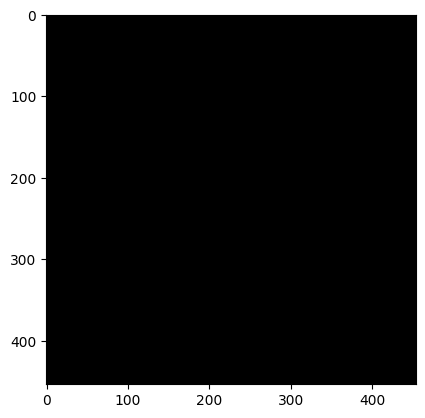

In [ ]:
plt.imshow(new, cmap = "gray")

In [ ]:
np.array([[1, 1], [1, 1]]) * np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [4]:
np.square(np.array([[1, 2], [3, 4]]))

array([[ 1,  4],
       [ 9, 16]])